### 1. import libraries, define path, import dataframe
### 2. address security implications; PII
### 3. geographic region; spending analysis
### 4. activity categorization
### 5. customer profiles
### 6. profile visualizations
### 7. customer profile aggregation
### 8. customer comparisons
### 9. export charts

## 1. import libraries, define path, import dataframe

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Define path
path = r'C:\Users\Personal Computer\Documents\09.2022_Instacart_Basket_Analysis'

In [5]:
# Import instacart_orders_products_customers.pkl 
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_orders_products_customers.pkl'))

## 5. customer profiles

In [8]:
# Import orders_products_all.pkl 
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [9]:
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
df.loc[df['state'].isin(Northeast), 'geographic_region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'geographic_region'] = 'Midwest'
df.loc[df['state'].isin(South), 'geographic_region'] = 'South'
df.loc[df['state'].isin(West), 'geographic_region'] = 'West'

In [11]:
# Check import of new dataframe with geographic region
df['geographic_region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: geographic_region, dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32404854
Data columns (total 39 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   user_order_number       int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   first_order             object 
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  Unnamed: 0_y            int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
 14  prices                  float64
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_days            object 
 18  busiest_hours           object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  mean_order_price        float

# OKAY THOSE

In [131]:
df['geographic_region'].value_counts(dropna = False).to_clipboard()

In [132]:
crosstab298 = pd.crosstab(df['geographic_region'], df['spending_flag'], dropna=False)

In [137]:
crosstab298.to_clipboard()

Text(0, 0.5, 'number of customers')

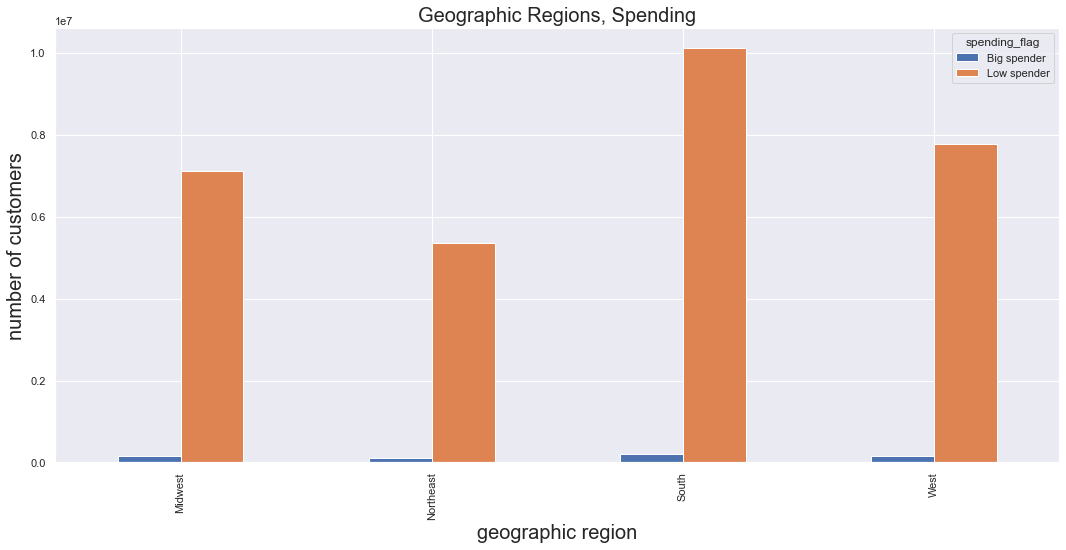

In [136]:
## (kind='bar')
sns.set(rc = {'figure.figsize':(18,8)})
crosstab298_bar = crosstab298.plot.bar()
plt.title('Geographic Regions, Spending', fontsize=20)
plt.xlabel('geographic region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

In [142]:
crosstab398 = pd.crosstab(df['geographic_region'], df['frequency_flag'], dropna=False)

In [143]:
crosstab398.to_clipboard()

Text(0, 0.5, 'number of customers')

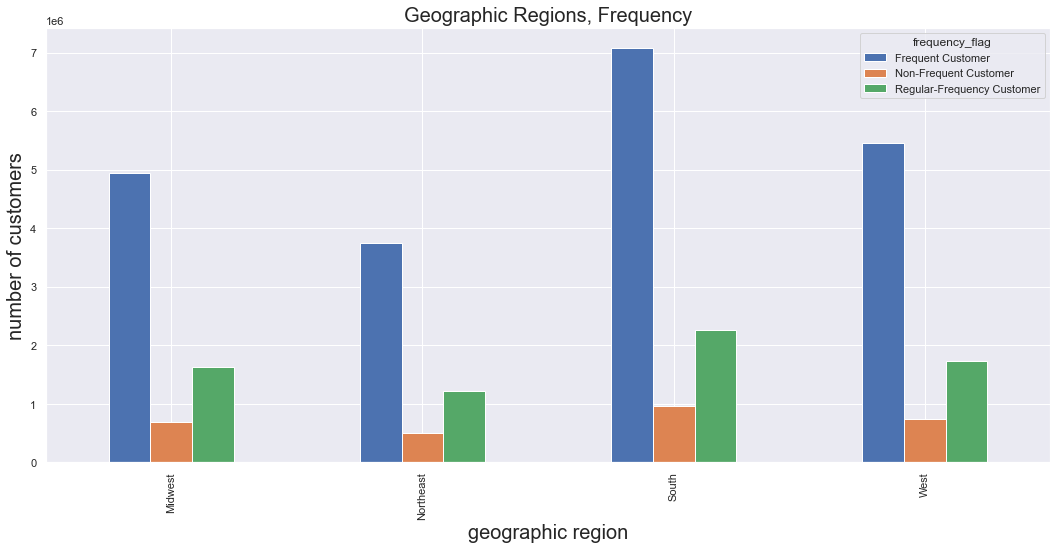

In [144]:
## (kind='bar')
sns.set(rc = {'figure.figsize':(18,8)})
crosstab398_bar = crosstab398.plot.bar()
plt.title('Geographic Regions, Frequency', fontsize=20)
plt.xlabel('geographic region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

In [145]:
crosstab498 = pd.crosstab(df['geographic_region'], df['loyalty_flag'], dropna=False)

In [146]:
crosstab498.to_clipboard()

Text(0, 0.5, 'number of customers')

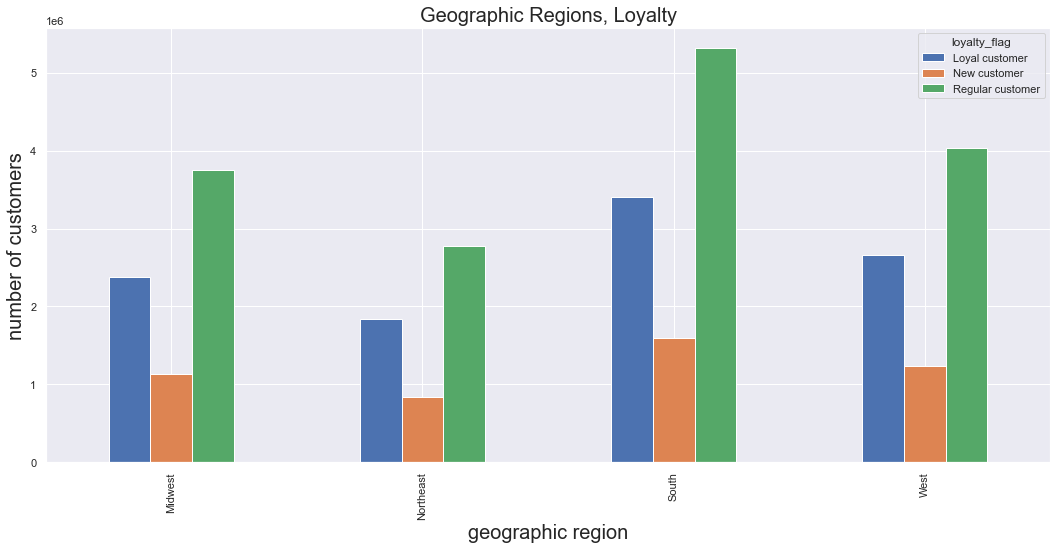

In [162]:
## (kind='bar')
sns.set(rc = {'figure.figsize':(18,8)})
crosstab498_bar = crosstab498.plot.bar()
plt.title('Geographic Regions, Loyalty', fontsize=20)
plt.xlabel('geographic region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

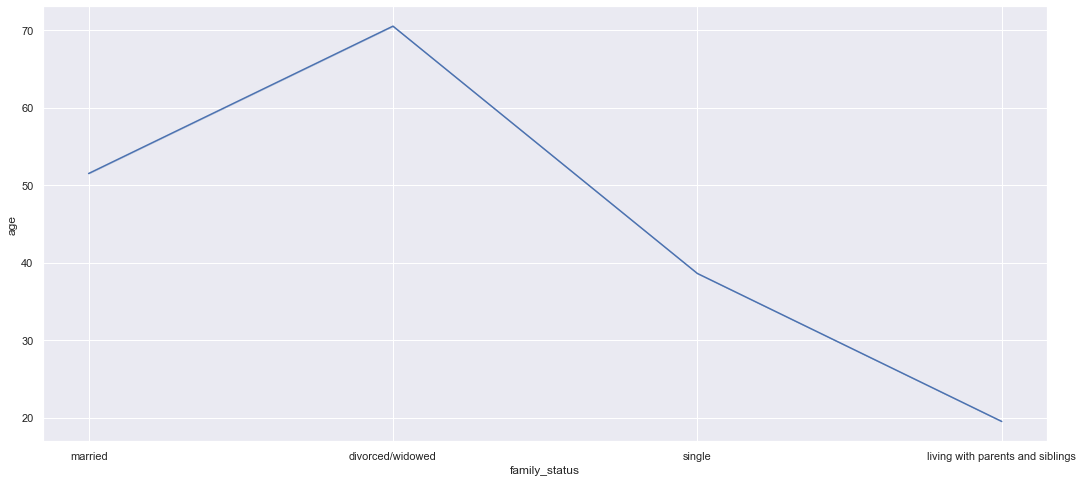

In [165]:
line_age1c_ = sns.lineplot(data = df, x = 'family_status', y ='age')

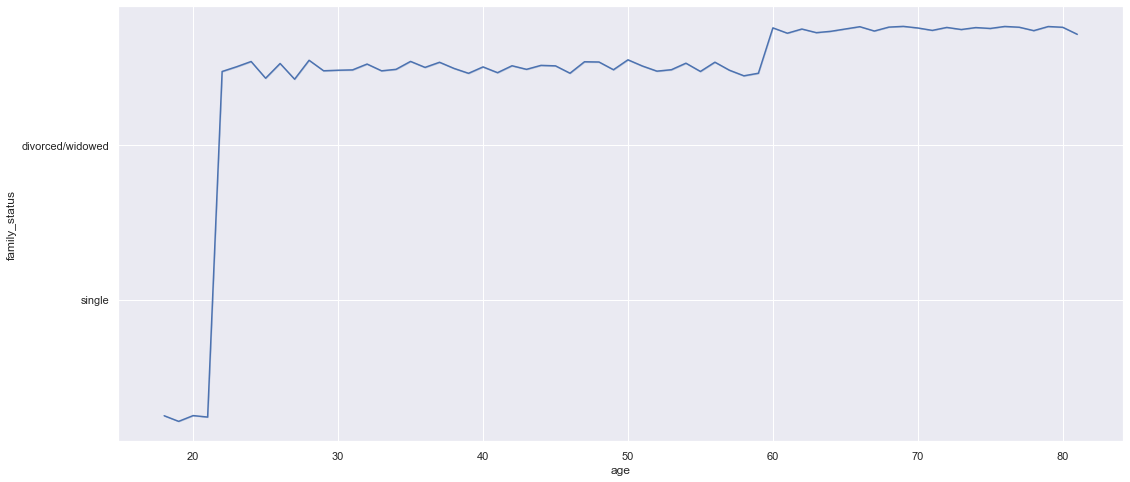

In [166]:
line_age2d_ = sns.lineplot(data = df, x = 'age', y ='family_status')

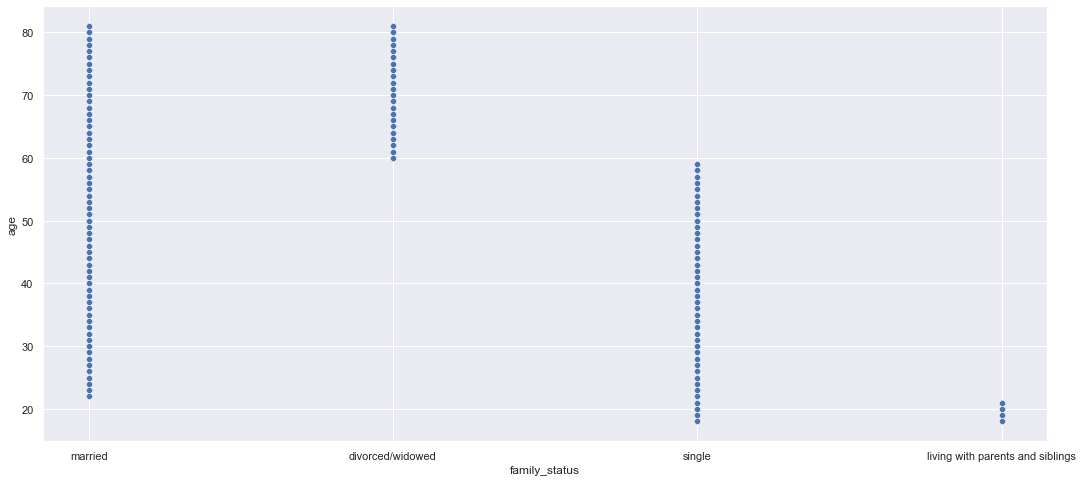

In [167]:
# create a scatterplot
scatter_age = sns.scatterplot(x = 'family_status', y = 'age', data = df)

In [156]:
income_cross = pd.crosstab(df['income_group'], df['price_range_loc'], dropna=False)

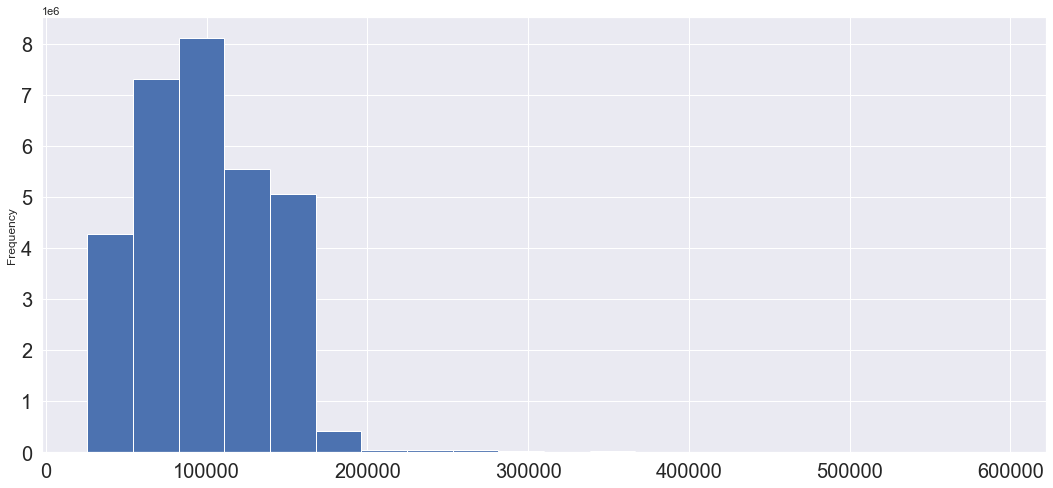

In [158]:
hist=df['income'].plot.hist(bins=20, fontsize=20)

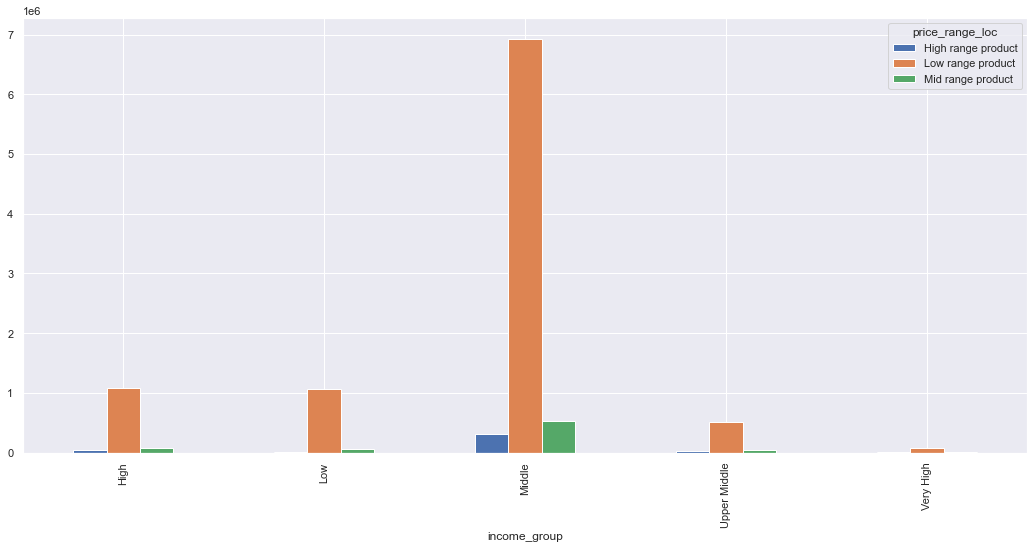

In [159]:
income_cross_bar = income_cross.plot(kind='bar')

In [176]:
crosstab698 = pd.crosstab(df['department'], df['dependent_group'], dropna=False)

In [177]:
crosstab698.to_clipboard()

Text(0, 0.5, 'orders')

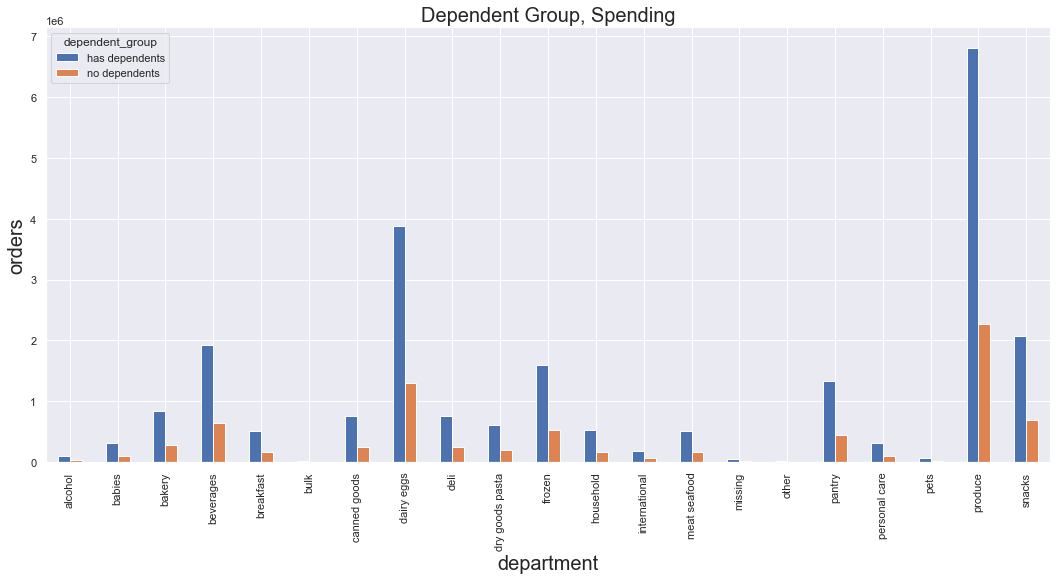

In [182]:
## (kind='bar')
sns.set(rc = {'figure.figsize':(18,8)})
crosstab698_bar = crosstab698.plot.bar()
plt.title('Dependent Group, Spending', fontsize=20)
plt.xlabel('department', fontsize=20)
plt.ylabel('orders', fontsize=20)

In [179]:
crosstab798 = pd.crosstab(df['department'], df['income_group'], dropna=False)

Text(0, 0.5, 'orders')

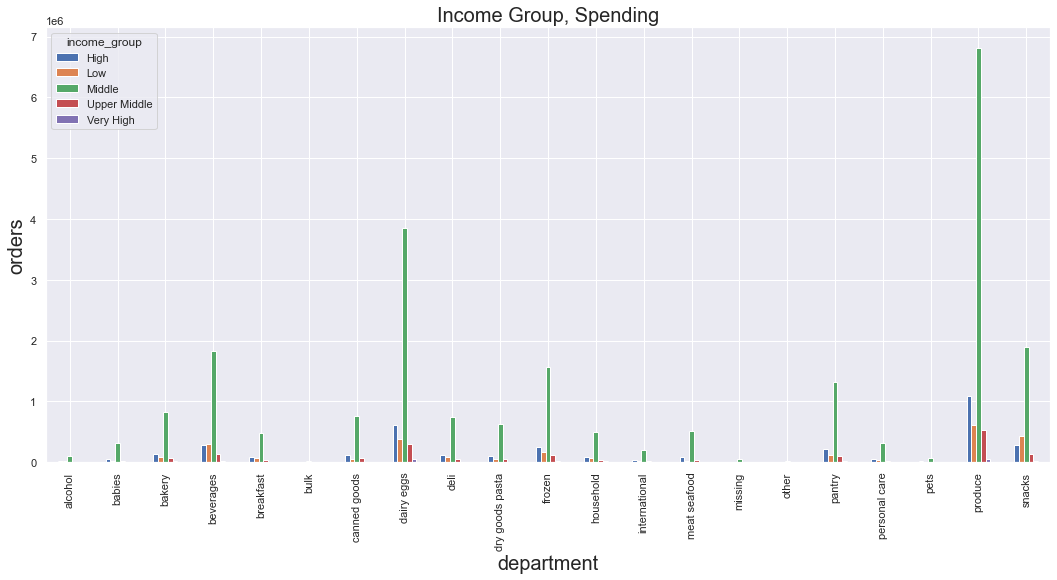

In [183]:
sns.set(rc = {'figure.figsize':(18,8)})
crosstab798_bar = crosstab798.plot.bar()
plt.title('Income Group, Spending', fontsize=20)
plt.xlabel('department', fontsize=20)
plt.ylabel('orders', fontsize=20)

In [181]:
crosstab898 = pd.crosstab(df['department'], df['order_time_group'], dropna=False)

Text(0, 0.5, 'orders')

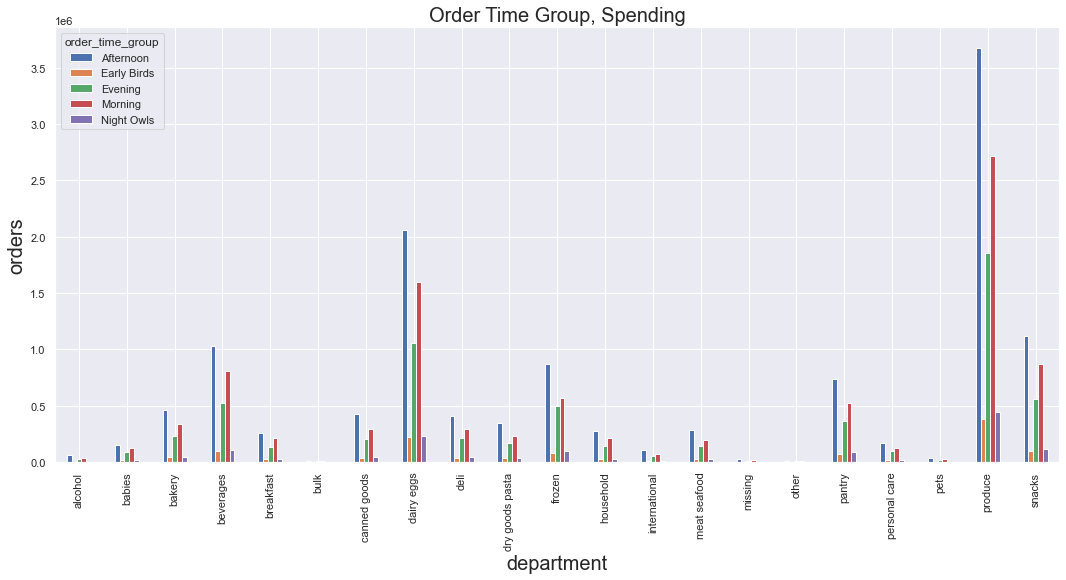

In [184]:
sns.set(rc = {'figure.figsize':(18,8)})
crosstab898_bar = crosstab898.plot.bar()
plt.title('Order Time Group, Spending', fontsize=20)
plt.xlabel('department', fontsize=20)
plt.ylabel('orders', fontsize=20)

In [ ]:
crosstab699 = pd.crosstab(df['dependent_group'], df['income'], dropna=False)

In [ ]:
crosstab699 = pd.crosstab(df['dependent_group'], df['income'], dropna=False)

In [ ]:
crosstab699 = pd.crosstab(df['dependent_group'], df['income'], dropna=False)

In [ ]:
bar=df_unique['age_group'].value_counts().plot.bar(color='#4690b7', fontsize=20)

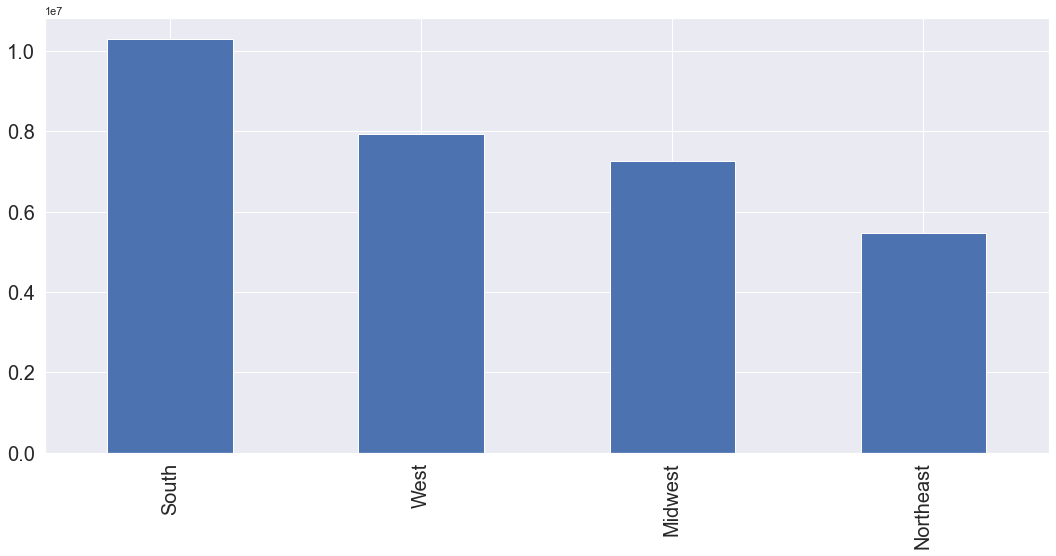

In [118]:
sns.set(rc = {'figure.figsize':(18,8)})
bargra = df['geographic_region'].value_counts().plot.bar(fontsize=20)

In [13]:
# Age groups
df.loc[df['age'] <= 24, 'age_group'] ='18-24 years'
df.loc[(df['age'] >= 25) & (df['age'] < 35), 'age_group'] ='25-34 years'
df.loc[(df['age'] >= 35) & (df['age'] < 45), 'age_group'] ='35-44 years'
df.loc[(df['age'] >= 45) & (df['age'] < 55), 'age_group'] ='45-54 years'
df.loc[(df['age'] >= 55) & (df['age'] < 65), 'age_group'] ='55-64 years'
df.loc[df['age'] >= 65, 'age_group'] ='65+ years'

In [14]:
df['age_group'].value_counts(dropna = False)

65+ years      8195544
45-54 years    4887564
35-44 years    4836674
25-34 years    4827101
55-64 years    4802487
18-24 years    3415194
Name: age_group, dtype: int64

In [15]:
df['age_group'].value_counts(dropna = False).to_clipboard()

In [16]:
# Income
df.loc[df['income'] < 20000, 'income_group'] ='Very Low'
df.loc[(df['income'] >= 20000) & (df['income'] < 45000), 'income_group'] ='Low'
df.loc[(df['income'] >= 45000) & (df['income'] < 140000), 'income_group'] ='Middle'
df.loc[(df['income'] >= 140000) & (df['income'] < 150000), 'income_group'] ='Upper Middle'
df.loc[(df['income'] >= 150000) & (df['income'] < 200000), 'income_group'] ='High'
df.loc[df['income'] >= 200000, 'income_group'] ='Very High'

In [17]:
df['income_group'].value_counts(dropna = False)

Middle          22805026
High             3641133
Low              2518783
Upper Middle     1745480
Very High         254142
Name: income_group, dtype: int64

In [18]:
df['income_group'].value_counts(dropna = False).to_clipboard()

In [19]:
# Dependents?
df.loc[df['number_of_dependents']>0, 'dependent_group']='has dependents'
df.loc[df['number_of_dependents']==0,'dependent_group']='no dependents'

In [20]:
df['dependent_group'].value_counts(dropna = False)

has dependents    23224883
no dependents      7739681
Name: dependent_group, dtype: int64

In [21]:
df['dependent_group'].value_counts(dropna = False).to_clipboard()

In [22]:
# Family status
df['family_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: family_status, dtype: int64

In [23]:
df['family_status'].value_counts(dropna = False).to_clipboard()

In [24]:
# import department desscriptions from data dicitionary created in 4.4
departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [25]:
# adding data dictionary 'detpartment' to corresponding 'department_id'
zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [26]:
df['department'] = df['department_id'].map(data_dict)

In [27]:
df.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,date_joined,number_of_dependents,family_status,income,geographic_region,activity,age_group,income_group,dependent_group,department
0,2539329,1,1,2,8,NaN,yes,196,1,0,...,2/17/2019,3,married,40423,South,regular activity,25-34 years,Low,has dependents,beverages
1,2398795,1,2,3,7,15.0,no,196,1,1,...,2/17/2019,3,married,40423,South,regular activity,25-34 years,Low,has dependents,beverages
2,473747,1,3,3,12,21.0,no,196,1,1,...,2/17/2019,3,married,40423,South,regular activity,25-34 years,Low,has dependents,beverages
3,2254736,1,4,4,7,29.0,no,196,1,1,...,2/17/2019,3,married,40423,South,regular activity,25-34 years,Low,has dependents,beverages
4,431534,1,5,4,15,28.0,no,196,1,1,...,2/17/2019,3,married,40423,South,regular activity,25-34 years,Low,has dependents,beverages


In [28]:
df['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [29]:
# Ordering Time
Early_Birds = [4, 5, 6, 7]
Morning = [8, 9, 10, 11]
Afternoon = [12, 13, 14, 15, 16]
Evening = [17, 18, 19, 20, 21]
Night_Owls = [22, 23, 0, 1, 2, 3]

In [30]:
df.loc[df['order_hour_of_day'].isin(Early_Birds), 'order_time_group'] = 'Early Birds'
df.loc[df['order_hour_of_day'].isin(Morning), 'order_time_group'] = 'Morning'
df.loc[df['order_hour_of_day'].isin(Afternoon), 'order_time_group'] = 'Afternoon'
df.loc[df['order_hour_of_day'].isin(Evening), 'order_time_group'] = 'Evening'
df.loc[df['order_hour_of_day'].isin(Night_Owls), 'order_time_group'] = 'Night Owls'

In [31]:
df['order_time_group'].value_counts(dropna = False)

Afternoon      12552621
Morning         9287345
Evening         6421427
Night Owls      1423764
Early Birds     1279407
Name: order_time_group, dtype: int64

In [32]:
df['order_time_group'].value_counts(dropna = False).to_clipboard()

In [33]:
df.columns

Index(['order_id', 'user_id', 'user_order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_hours',
       'max_order', 'loyalty_flag', 'mean_order_price', 'spending_flag',
       'median_prior_order', 'frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependents', 'family_status', 'income',
       'geographic_region', 'activity', 'age_group', 'income_group',
       'dependent_group', 'department', 'order_time_group'],
      dtype='object')

## 6. profile visualizations

In [34]:
df['geographic_region'].value_counts()

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: geographic_region, dtype: int64

In [35]:
df['geographic_region'].value_counts().to_clipboard()

Text(0, 0.5, 'number of customers')

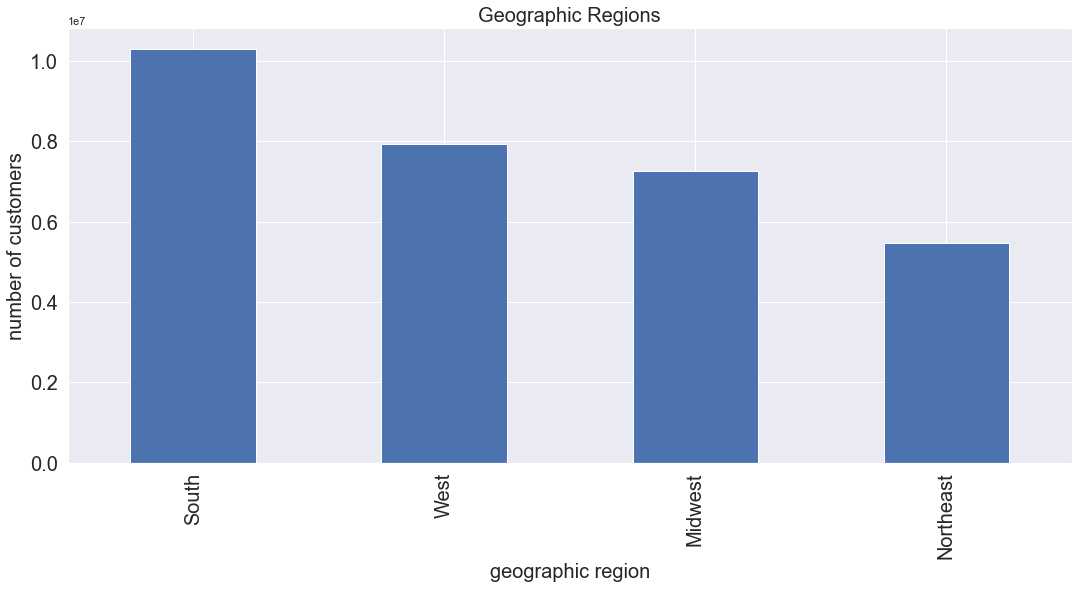

In [117]:
# geographic
sns.set(rc = {'figure.figsize':(18,8)})
bargr = df['geographic_region'].value_counts().plot.bar(fontsize=20)
plt.title('Geographic Regions', fontsize=20)
plt.xlabel('geographic region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

Text(0, 0.5, 'number of customers')

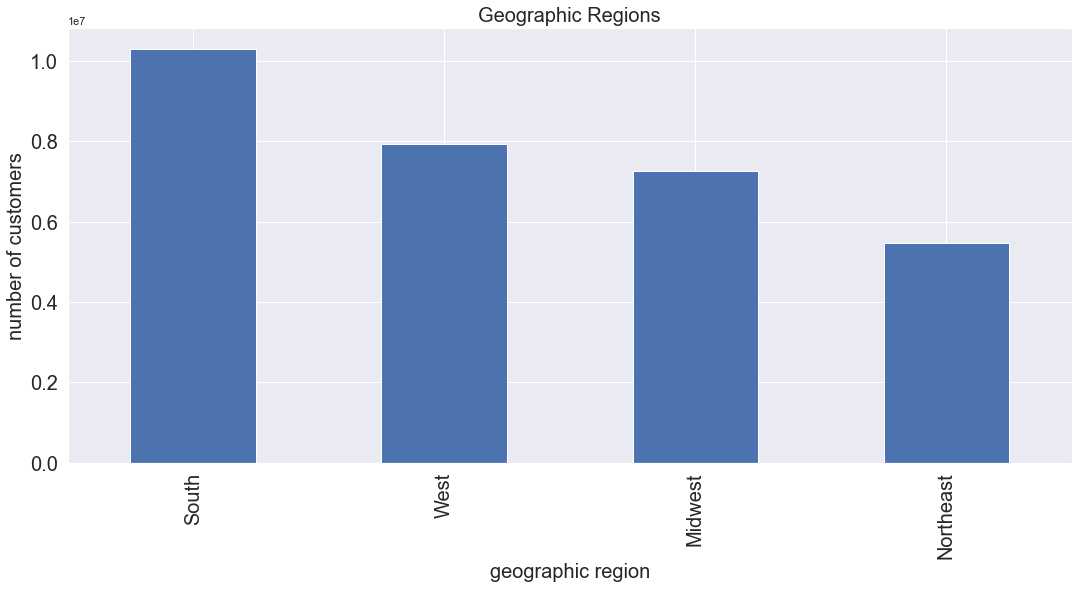

In [37]:
# geographic
sns.set(rc = {'figure.figsize':(18,8)})
bargr = df['geographic_region'].value_counts().plot.bar(fontsize=20)
plt.title('Geographic Regions', fontsize=20)
plt.xlabel('geographic region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

Text(0, 0.5, 'number of customers')

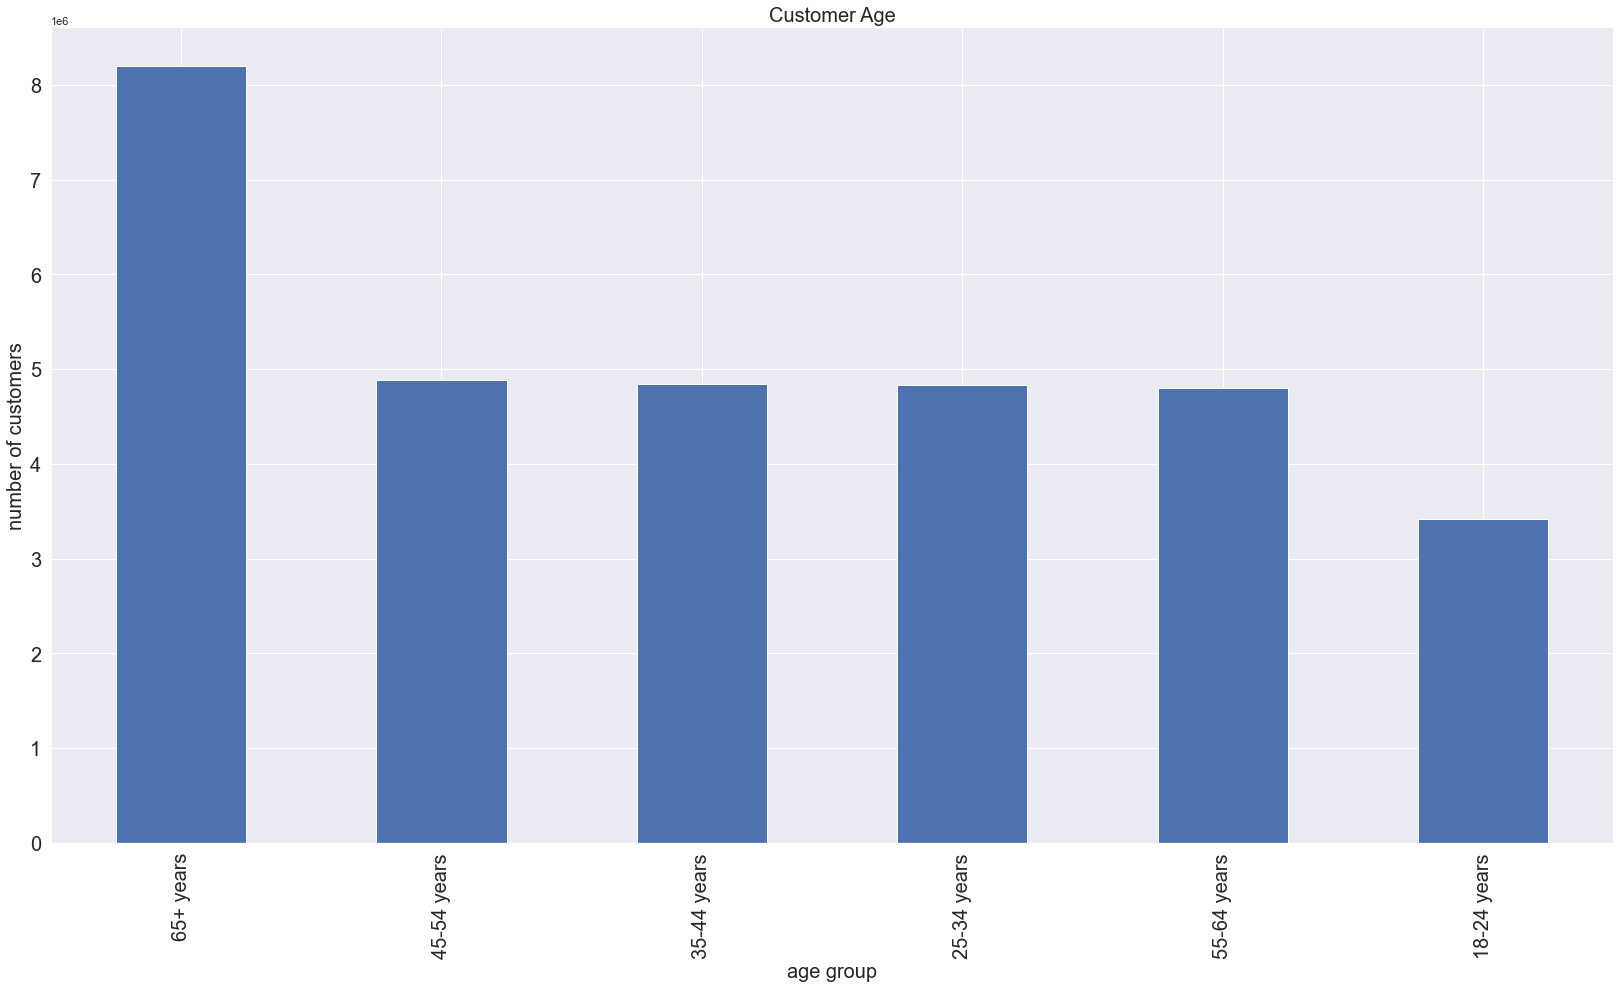

In [38]:
# age group
sns.set(rc = {'figure.figsize':(28,15)})
barag = df['age_group'].value_counts().plot.bar(fontsize=20)
plt.title('Customer Age', fontsize = 20)
plt.xlabel('age group', fontsize = 20)
plt.ylabel('number of customers', fontsize = 20)

Text(0, 0.5, 'number of customers')

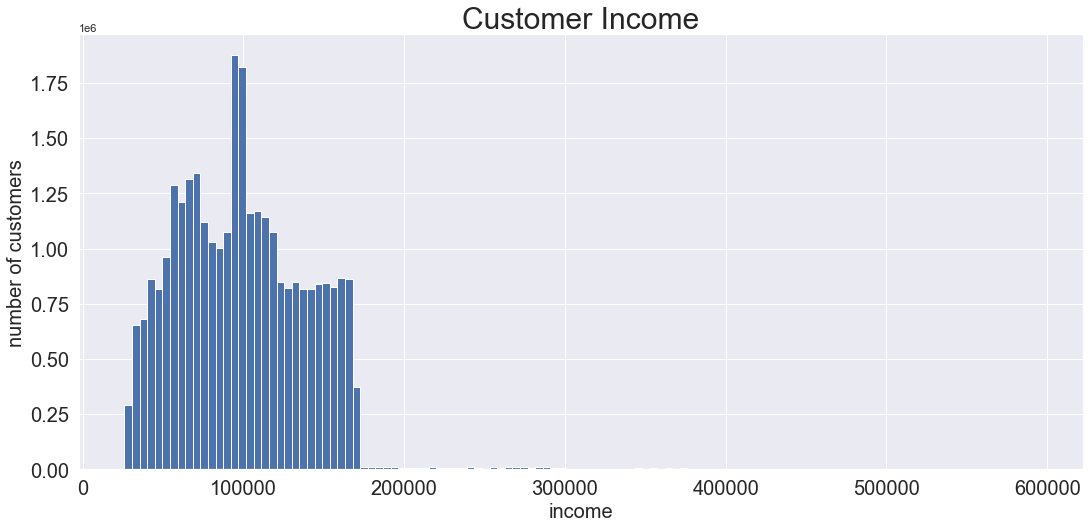

In [39]:
# income
sns.set(rc = {'figure.figsize':(18,8)})
histig = df['income'].plot.hist(bins = 120, fontsize = 20)
plt.title('Customer Income', fontsize = 30)
plt.xlabel('income', fontsize = 20)
plt.ylabel('number of customers', fontsize = 20)

Text(0, 0.5, 'number of customers')

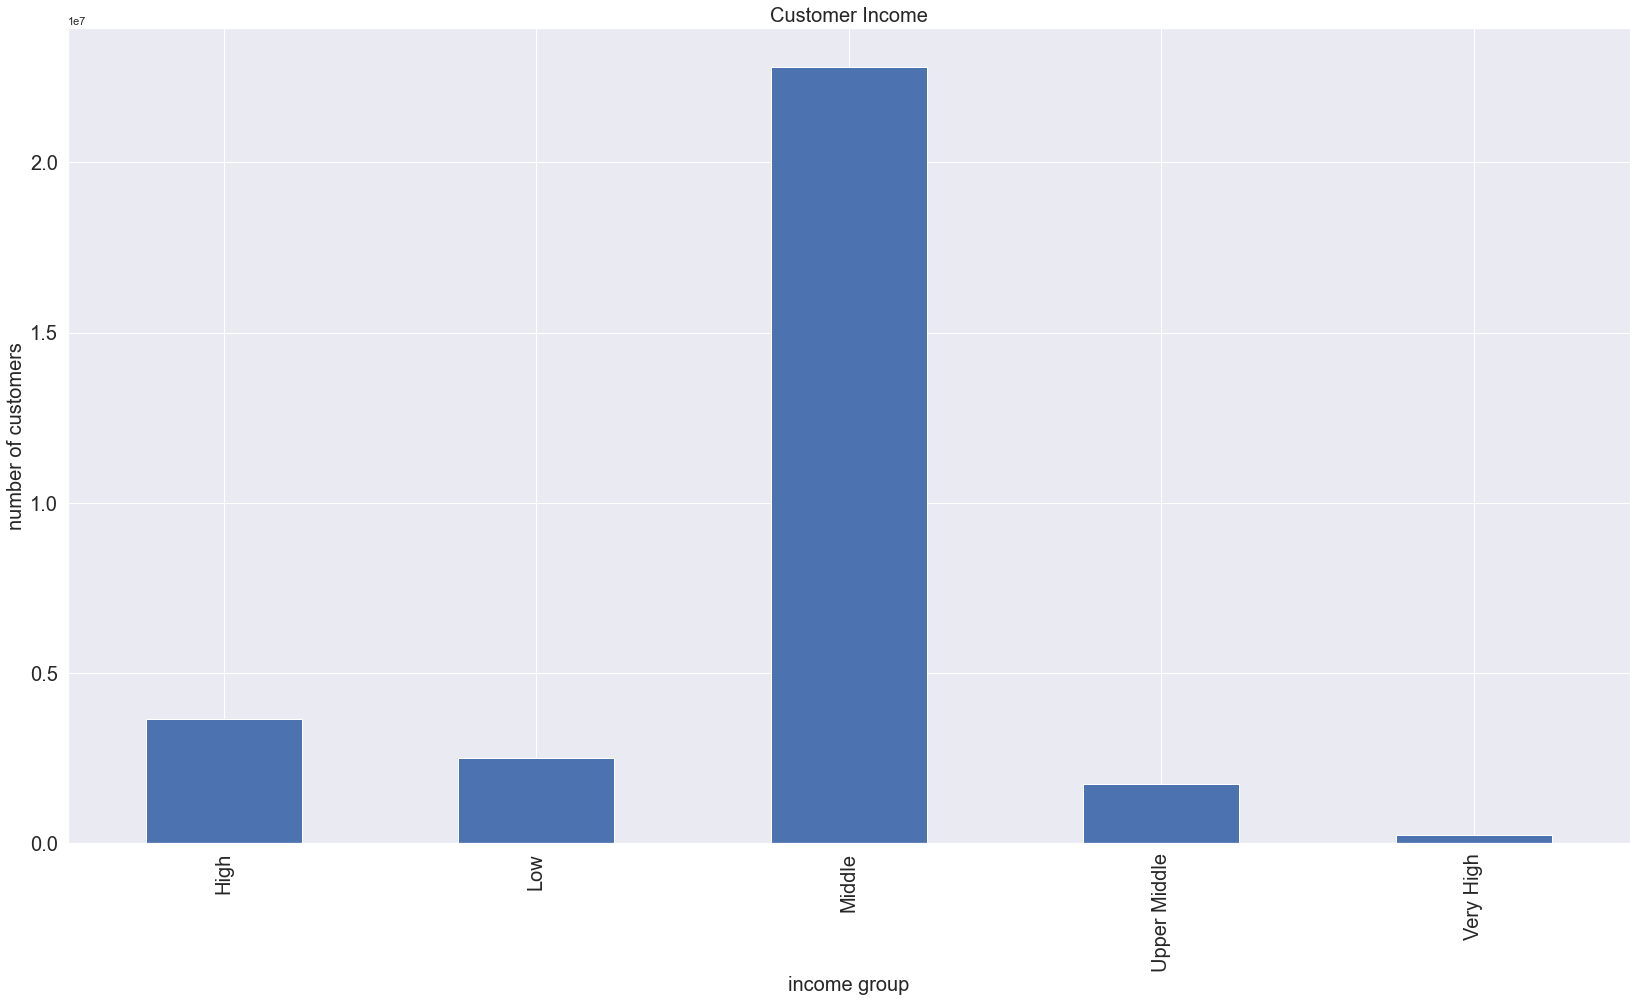

In [40]:
sns.set(rc = {'figure.figsize':(28,15)})
barig = df['income_group'].value_counts().sort_index().plot.bar(fontsize=20)
plt.title('Customer Income', fontsize = 20)
plt.xlabel('income group', fontsize = 20)
plt.ylabel('number of customers', fontsize = 20)

Text(0.5, 1.0, 'Has Dependent')

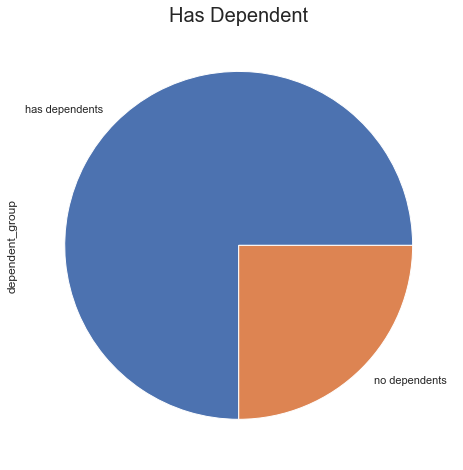

In [41]:
# dependent
sns.set(rc = {'figure.figsize':(18,8)})
pieg = df['dependent_group'].value_counts().plot.pie()
plt.title('Has Dependent', fontsize=20)

Text(0, 0.5, 'number of customers')

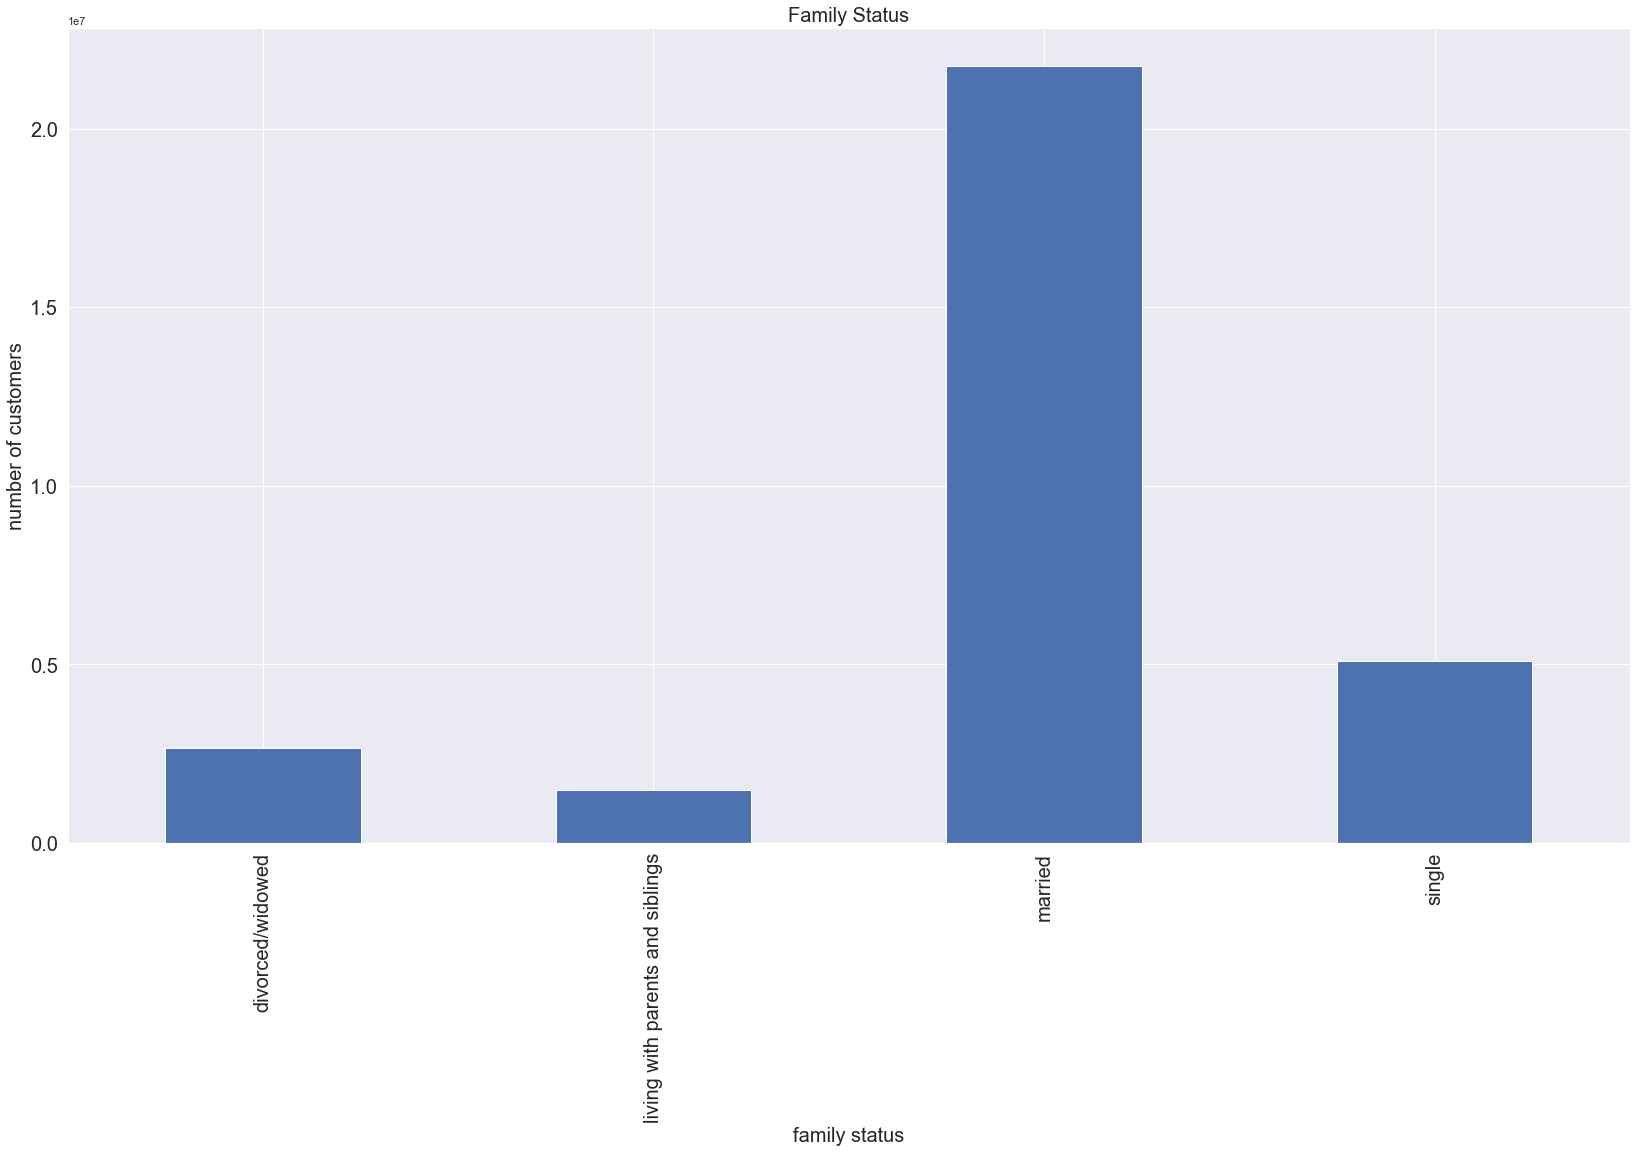

In [42]:
# family status
sns.set(rc = {'figure.figsize':(28,15)})
barfs = df['family_status'].value_counts().sort_index().plot.bar(fontsize=20)
plt.title('Family Status', fontsize = 20)
plt.xlabel('family status', fontsize = 20)
plt.ylabel('number of customers', fontsize = 20)

Text(0.5, 1.0, 'Time Order Placed')

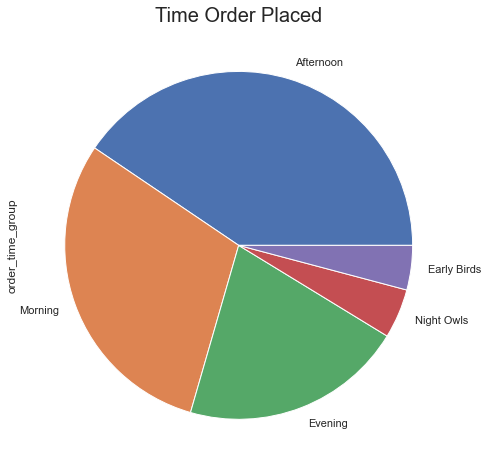

In [44]:
# ordering time
sns.set(rc = {'figure.figsize':(18,8)})
pieotg = df['order_time_group'].value_counts().plot.pie()
plt.title('Time Order Placed', fontsize=20)

## 7. customer profile aggregation

In [45]:
df['median_prior_order'].describe()

count    3.096456e+07
mean     9.957140e+00
std      6.666137e+00
min      0.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      1.250000e+01
max      3.000000e+01
Name: median_prior_order, dtype: float64

In [46]:
df.groupby(['geographic_region']).agg({'median_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_prior_order                prices              
                                mean  min   max       mean  min      max
geographic_region                                                       
Midwest                    10.019931  0.0  30.0  12.681835  1.0  99999.0
Northeast                   9.924985  0.0  30.0  11.542582  1.0  99999.0
South                       9.955835  0.0  30.0  12.118845  1.0  99999.0
West                        9.923485  0.0  30.0  11.276491  1.0  99999.0

In [47]:
df.groupby(['age_group']).agg({'median_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_prior_order                prices              
                          mean  min   max       mean  min      max
age_group                                                         
18-24 years           9.911733  0.0  30.0  12.444676  1.0  99999.0
25-34 years           9.993060  0.0  30.0  11.914146  1.0  99999.0
35-44 years           9.922247  0.0  30.0  11.532103  1.0  99999.0
45-54 years           9.978839  0.0  30.0  11.942770  1.0  99999.0
55-64 years          10.007535  0.0  30.0  12.284287  1.0  99999.0
65+ years             9.933025  0.0  30.0  11.757768  1.0  99999.0

In [48]:
df.groupby(['income_group']).agg({'median_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_prior_order                 prices              
                           mean  min   max        mean  min      max
income_group                                                        
High                   9.842473  0.0  30.0   17.114203  1.0  99999.0
Low                   10.582920  0.0  30.0    6.620117  1.0     25.0
Middle                 9.916977  0.0  30.0    9.097906  1.0  99999.0
Upper Middle           9.952967  0.0  30.0   10.494612  1.0  99999.0
Very High              9.030562  1.0  30.0  254.701824  1.0  99999.0

In [49]:
df.groupby(['dependent_group']).agg({'median_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_prior_order                prices              
                              mean  min   max       mean  min      max
dependent_group                                                       
has dependents            9.963995  0.0  30.0  11.877157  1.0  99999.0
no dependents             9.936569  0.0  30.0  12.102657  1.0  99999.0

In [52]:
df.groupby(['family_status']).agg({'median_prior_order':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

median_prior_order                prices  \
                                               mean  min   max       mean   
family_status                                                               
divorced/widowed                           9.874549  0.0  30.0  11.532741   
living with parents and siblings           9.869971  0.0  30.0  10.890167   
married                                    9.970400  0.0  30.0  11.944390   
single                                     9.968773  0.0  30.0  12.398586   

                                                
                                  min      max  
family_status                                   
divorced/widowed                  1.0  99999.0  
living with parents and siblings  1.0  99999.0  
married                           1.0  99999.0  
single                            1.0  99999.0

In [53]:
df.groupby(['order_time_group']).agg({'median_prior_order':['mean', 'min', 'max']})

median_prior_order           
                               mean  min   max
order_time_group                              
Afternoon                 10.154720  0.0  30.0
Early Birds                9.081189  0.0  30.0
Evening                   10.280732  0.0  30.0
Morning                    9.563031  0.0  30.0
Night Owls                10.113661  0.0  30.0

## 8. customer comparisons

In [54]:
crosstab1 = pd.crosstab(df['geographic_region'], df['spending_flag'], dropna=False)

In [55]:
crosstab1

spending_flag,Big spender,Low spender
geographic_region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


In [57]:
crosstab1.to_clipboard()

In [58]:
crosstab2 = pd.crosstab(df['geographic_region'], df['frequency_flag'], dropna=False)

In [59]:
crosstab2

frequency_flag,Frequent Customer,Non-Frequent Customer,Regular-Frequency Customer
geographic_region,,,
Midwest,4935393,690030,1636090
Northeast,3740982,496911,1226792
South,7073789,968006,2269344
West,5454312,740028,1732887


# REgtions and habuts

In [60]:
crosstab2.to_clipboard()

In [61]:
crosstab3 = pd.crosstab(df['geographic_region'], df['age_group'], dropna=False)

In [62]:
crosstab3

age_group,18-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65+ years
geographic_region,,,,,,
Midwest,791626,1120247,1159115,1158154,1128325,1904046
Northeast,602790,865285,814192,872306,825305,1484807
South,1165136,1603322,1639254,1587874,1607092,2708461
West,855642,1238247,1224113,1269230,1241765,2098230


In [63]:
crosstab3.to_clipboard()

In [64]:
crosstab4 = pd.crosstab(df['geographic_region'], df['income_group'], dropna=False)

In [65]:
crosstab4

income_group,High,Low,Middle,Upper Middle,Very High
geographic_region,,,,,
Midwest,853402,572646,5348796,422576,64093
Northeast,637624,446168,4015280,325507,40106
South,1207014,854810,7609946,555923,83446
West,943093,645159,5831004,441474,66497


In [66]:
crosstab4.to_clipboard()

In [67]:
crosstab5 = pd.crosstab(df['geographic_region'], df['dependent_group'], dropna=False)

In [68]:
crosstab5

dependent_group,has dependents,no dependents
geographic_region,,
Midwest,5438697,1822816
Northeast,4110203,1354482
South,7729206,2581933
West,5946777,1980450


In [69]:
crosstab5.to_clipboard()

In [70]:
crosstab6 = pd.crosstab(df['geographic_region'], df['family_status'], dropna = False)

In [71]:
crosstab6

family_status,divorced/widowed,living with parents and siblings,married,single
geographic_region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


In [72]:
crosstab6.to_clipboard()

In [73]:
crosstab7 = pd.crosstab(df['geographic_region'], df['median_prior_order'], dropna = False)

In [74]:
crosstab7

median_prior_order,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0
geographic_region,,,,,,,,,,,,,,,,,,,,,
Midwest,5119,0,28741,64,119752,849,347682,3231,523131,7135,...,2333,31215,1578,37556,1547,42546,1432,26811,891,270888
Northeast,4847,9,28408,132,101189,663,250552,2789,412891,5254,...,566,27974,490,25037,556,31695,1142,22117,680,198946
South,10522,32,47973,1149,184035,3245,500174,2394,748468,11101,...,2026,49459,1235,51276,1983,56662,1813,39897,1327,383959
West,7036,44,41123,185,143972,2110,365094,3338,604550,5494,...,1419,36199,1165,38030,844,44272,1571,29258,1250,296592


In [77]:
crosstab7.to_clipboard()

In [78]:
crosstab9 = pd.crosstab(df['geographic_region'], df['order_time_group'], dropna = False)

In [79]:
crosstab9

order_time_group,Afternoon,Early Birds,Evening,Morning,Night Owls
geographic_region,,,,,
Midwest,2936875,297755,1519185,2173207,334491
Northeast,2219998,226832,1125535,1633884,258436
South,4161531,430788,2141867,3104940,472013
West,3234217,324032,1634840,2375314,358824


In [80]:
crosstab9.to_clipboard()

In [81]:
crosstab10 = pd.crosstab(df['geographic_region'], df['department'], dropna = False)

In [82]:
crosstab10

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
geographic_region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


In [83]:
crosstab10.to_clipboard()

In [84]:
crosstab11 = pd.crosstab(df['age_group'], df['department'], dropna = False)

In [85]:
crosstab11

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
18-24 years,17477,45825,123582,279256,75448,3767,111594,573152,109972,91735,...,77019,28610,75237,7439,3923,196701,46534,11304,999328,303203
25-34 years,22740,61475,175139,397761,104875,5254,159191,813149,156498,128008,...,107353,40491,103821,10314,5519,277764,65640,13836,1413774,437023
35-44 years,21138,66978,175306,396177,103957,5187,158006,810319,158055,128157,...,109995,39948,104646,9760,5212,276928,66344,14512,1427214,430067
45-54 years,23917,67379,176827,410639,106934,5252,159576,814914,156708,129484,...,110616,40849,105382,10680,5448,281463,68143,14163,1424483,437377
55-64 years,22662,62531,173977,404048,104340,5046,156198,797576,157402,127436,...,108244,38894,104545,9660,5363,277466,66593,14130,1406370,430187
65+ years,36693,106204,295997,684020,175296,8945,267509,1368072,265199,217316,...,186630,67199,181150,16915,8946,472383,111052,25115,2408104,728549


In [86]:
crosstab11.to_clipboard()

In [87]:
crosstab12 = pd.crosstab(df['income_group'], df['median_prior_order'], dropna = False)

In [88]:
crosstab12

median_prior_order,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,...,25.5,26.0,26.5,27.0,27.5,28.0,28.5,29.0,29.5,30.0
income_group,,,,,,,,,,,,,,,,,,,,,
High,4361,0,12327,5,75227,690,162356,2551,281445,3227,...,523,15750,243,17112,876,22813,369,14885,415,131267
Low,1082,0,16507,0,45099,676,105155,1172,143493,2607,...,481,14894,638,16392,318,17013,773,13062,504,119274
Middle,21814,66,105620,1525,401304,5103,1083311,7473,1718034,21401,...,4664,106512,3347,108277,3558,124674,4392,83188,2778,833795
Upper Middle,267,19,9558,0,22863,398,93597,372,126780,1749,...,616,6720,240,9728,178,10029,424,6685,451,60933
Very High,0,0,2233,0,4455,0,19083,184,19288,0,...,60,971,0,390,0,646,0,263,0,5116


In [89]:
crosstab12.to_clipboard()

In [90]:
crosstab13 = pd.crosstab(df['income_group'], df['department'], dropna = False)

In [91]:
crosstab13

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
High,17940,50897,135840,288718,76893,3644,123325,614942,118585,99467,...,81154,30787,85363,7938,4083,216061,49494,11108,1085459,282853
Low,13462,21874,78253,292158,69606,3419,57774,373086,80124,47320,...,65299,15908,23453,4956,2969,122761,35487,6851,608793,434198
Middle,99491,310367,829586,1829586,481759,24549,760454,3846968,740406,620054,...,503510,192212,518744,47942,25019,1324941,311386,67821,6811954,1893572
Upper Middle,7607,25150,64545,136778,36063,1812,61432,297879,57411,48412,...,38368,15047,41062,3615,1869,103066,23902,5397,523674,132831
Very High,6127,2104,12604,24661,6529,27,9089,44307,7308,6883,...,11526,2037,6159,317,471,15876,4037,1883,49393,22952


In [92]:
crosstab13.to_clipboard()

In [93]:
crosstab14 = pd.crosstab(df['family_status'], df['department'], dropna = False)

In [94]:
crosstab14

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_status,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,11859,34351,95735,220879,56590,2676,84268,442602,86749,70251,...,58446,21814,57621,5064,2842,151891,36313,8025,777094,236244
living with parents and siblings,8379,19381,53684,119107,33198,1633,48477,250207,48119,39542,...,33349,12394,32344,3317,1815,85845,20201,5338,430539,131310
married,99421,287683,785749,1807453,471220,23818,712577,3632599,702333,578298,...,495150,179136,476559,45516,23882,1252956,297900,64120,6373293,1944658
single,24968,68977,185660,424462,109842,5324,166752,851774,166633,134045,...,112912,42647,108257,10871,5872,292013,69892,15577,1498347,454194


In [95]:
crosstab14.to_clipboard()

In [99]:
crosstab18 = pd.crosstab(df['order_time_group'], df['department'], dropna = False)

In [100]:
crosstab18

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_time_group,,,,,,,,,,,,,,,,,,,,,
Afternoon,67600,156399,459032,1034713,261168,13265,424411,2060458,412777,344139,...,277944,108265,281317,26007,14015,734307,168372,37993,3674845,1122314
Early Birds,3101,22714,48235,100447,30267,1324,39023,226225,39314,33100,...,30315,9465,27718,2703,1343,69601,18050,3908,386123,102893
Evening,30014,85872,231180,523637,137910,6935,204045,1061157,211608,174297,...,146770,52310,139923,13804,7562,368722,95174,22205,1857258,556748
Morning,40591,125522,334716,806593,211752,10271,297112,1596599,295055,232072,...,213315,73477,195357,18969,9913,524070,122650,25072,2714423,868540
Night Owls,3321,19885,47665,106511,29753,1656,47483,232743,45080,38528,...,31513,12474,30466,3285,1578,86005,20060,3882,446624,115911


In [101]:
crosstab18.to_clipboard()

In [102]:
crosstab19 = pd.crosstab(df['order_time_group'], df['income_group'], dropna = False)

In [103]:
crosstab19

income_group,High,Low,Middle,Upper Middle,Very High
order_time_group,,,,,
Afternoon,1466615,999981,9265815,716802,103408
Early Birds,152203,92231,952580,69625,12768
Evening,767877,485481,4750611,365899,51559
Morning,1083364,834956,6778300,513523,77202
Night Owls,171074,106134,1057720,79631,9205


In [104]:
crosstab19.to_clipboard()

In [105]:
df['busiest_hours'].value_counts()

Regularly Busy Hours    20346403
Busiest Hours           10368493
Least Busy Hours          249668
Name: busiest_hours, dtype: int64

Text(0, 0.5, 'Orders')

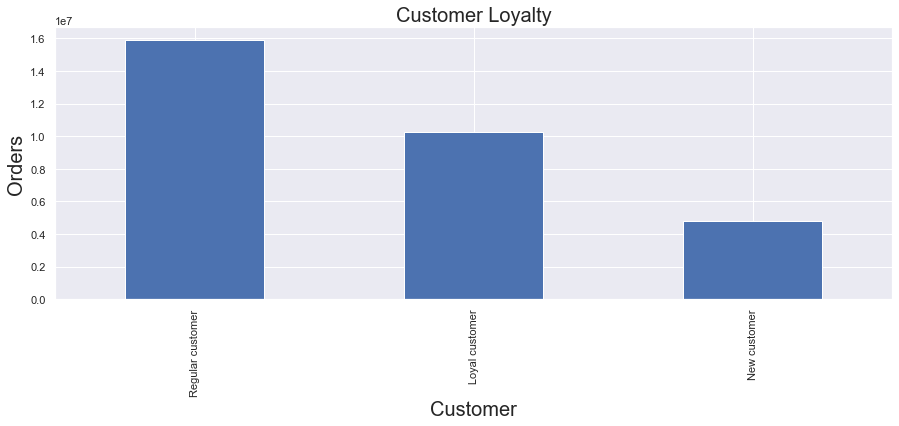

In [108]:
sns.set(rc = {'figure.figsize':(15,5)})
pieloy = df['loyalty_flag'].value_counts().plot.bar()
plt.title('Customer Loyalty', fontsize = 20)
plt.xlabel('Customer', fontsize = 20)
plt.ylabel('Orders', fontsize = 20) 

In [109]:
pieloy1 = df['loyalty_flag'].value_counts()

In [110]:
crosstab22 = pd.crosstab(df['loyalty_flag'], df['frequency_flag'], dropna = False)

In [111]:
crosstab22.to_clipboard()

In [112]:
crosstab30 = pd.crosstab(df['loyalty_flag'], df['frequency_flag'], dropna = False)

## 9. export charts

In [ ]:
bargr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_geo_reg.png'))
barag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_age.png'))
histig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_histig.png'))
barig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_barig.png'))
pieg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_pieig.png'))
barfs.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_barfs.png'))
pienp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_pienp.png'))
pieotg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'final_piotg.png'))

Text(0, 0.5, 'Orders')

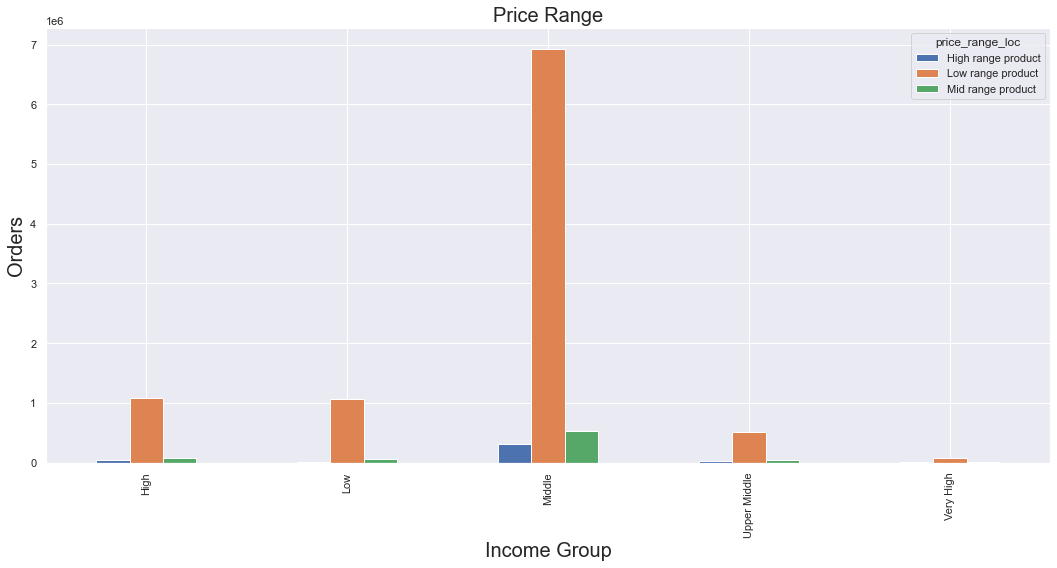

In [161]:
income_cross_bar = income_cross.plot(kind='bar')
plt.title('Price Range', fontsize = 20)
plt.xlabel('Income Group', fontsize = 20)
plt.ylabel('Orders', fontsize = 20) 